# Parte 3: Olivetti Faces

1.	Seguirá trabajando con el dataset: Olivetti Faces. Como primer paso usted deberá cargar los datos y corroborar las dimensiones del dataset, el cual debe ser 400 x 4096

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
from sklearn.datasets import fetch_olivetti_faces
data, targets = fetch_olivetti_faces(return_X_y=True)

In [19]:
print("Existen {} imagenes en el dataset".format(len(data)))
print("Existen {} objetivos unicos en el dataset".format(len(np.unique(targets))))
print("Dimensiones de los datos: {}".format(data.shape))
type(targets)

Existen 400 imagenes en el dataset
Existen 40 objetivos unicos en el dataset
Dimensiones de los datos: (400, 4096)


numpy.ndarray

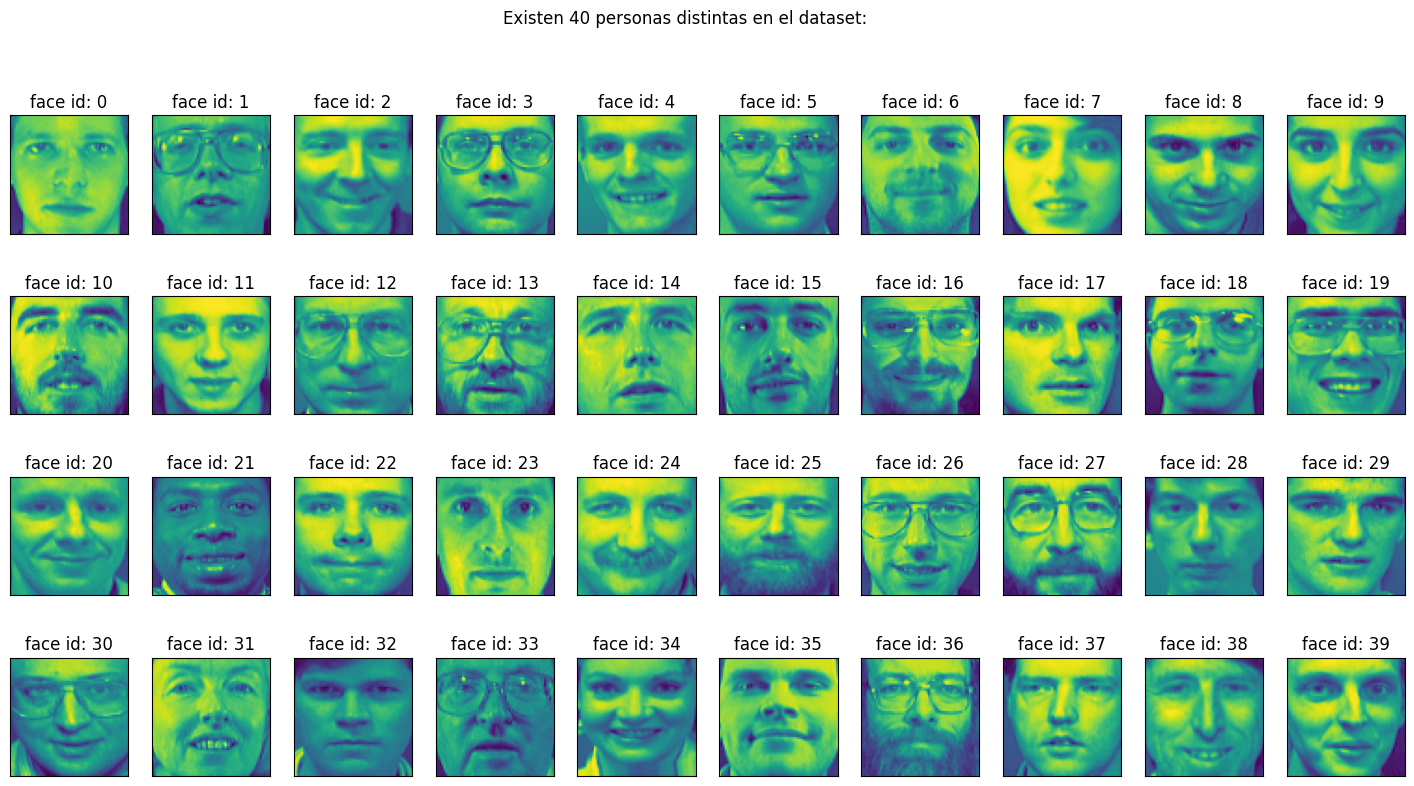

In [38]:
# Solo para efectos de observar las imágenes con las que trabajaremos, se muestra un ejemplo de cómo se ven las imágenes del dataset Olivetti Faces.
# Extraído de https://www.kaggle.com/code/serkanpeldek/face-recognition-on-olivetti-dataset

def show_40_distinct_people(images, unique_ids):
    # Creating 4X10 subplots in 18x9 figure size
    fig, axarr = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    # For easy iteration flattened 4X10 subplots matrix to a 40 array
    axarr = axarr.flatten()
    
    # Iterating over user ids
    for i, unique_id in enumerate(unique_ids):
        image_index = np.where(targets == unique_id)[0][0]  # Get the first image index for the unique_id
        image = images[image_index].reshape(64, 64, 1)  # Reshape the image to (64, 64, 1)
        axarr[i].imshow(image)
        axarr[i].set_xticks([])
        axarr[i].set_yticks([])
        axarr[i].set_title("face id: {}".format(unique_id))
    plt.suptitle("Existen 40 personas distintas en el dataset:")
    plt.show()

show_40_distinct_people(data, np.unique(targets))



2. Sabiendo que el número de clusters (personas) es 40, aplique K-Means y cluster jerárquico. Mediante el método del codo, identifique cuántos clusters le entrega cada uno de los algoritmos. ¿Cuál le da mejor resultado?


In [21]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [24]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Aplicamos el metodo KMeans iterativamente para graficar su sse

sse = []

for k in range(5,45):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Graficamos SSE vs k

fig, ax = plt.subplots(figsize=(20, 7))

ax.scatter(range(5, 45), sse)
ax.set_xticks(range(5, 45))
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('SSE')


c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-9 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\n3mes\miniconda3\envs\DataScience\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\n3mes\miniconda3\envs\DataScience\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\n3mes\miniconda3\envs\DataScience\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\joblib\externals\loky\

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert the data to float and scale it to [0, 1] range (important for image data)
data_scaled = data.astype('float32') / 255.0

# Elbow method for K-Means
inertia_values = []
max_clusters = 50  # Maximum number of clusters to try

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)


c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\n3mes\miniconda3\envs\DataScience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

De las iteraciones y grafico anterior, obtenemos:
- SSE para cada iteración de k
- La curva es convexa
- Con direccion decreciente

El codo esta en k =  12


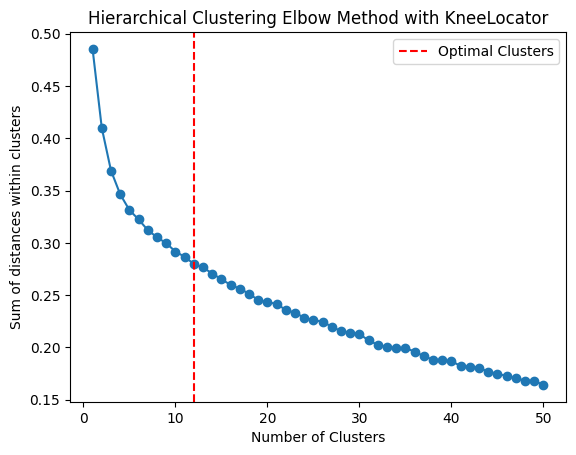

Optimal number of clusters: 12


In [41]:
kl = KneeLocator(range(1,max_clusters + 1), inertia_values, curve='convex', direction='decreasing')
print("El codo esta en k = ", kl.elbow)

# Plot the distances and the knee point
plt.plot(range(1, max_clusters + 1), inertia_values, marker='o')
plt.axvline(x=kl.elbow, color='red', linestyle='--', label='Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of distances within clusters')
plt.title('Hierarchical Clustering Elbow Method with KneeLocator')
plt.legend()
plt.show()

print(f"Optimal number of clusters: {kl.elbow}")


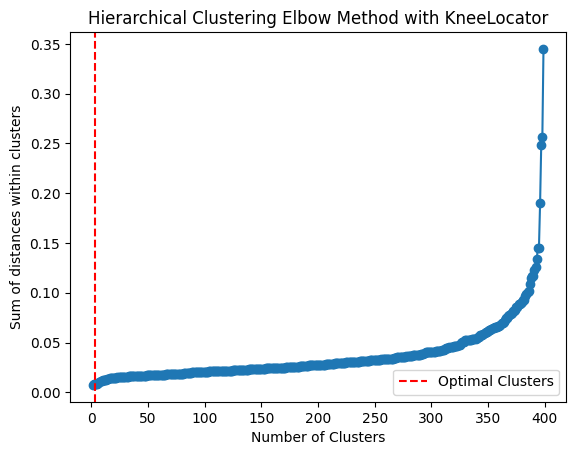

Optimal number of clusters: 3


In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Convert the data to float and scale it to [0, 1] range (important for image data)
data_scaled = data.astype('float32') / 255.0

# Calculate linkage and distances for hierarchical clustering
linked = linkage(data_scaled, method='ward')
distances = linked[:, 2]

# Calculate the first derivative of the distances
differences = [distances[i] - distances[i - 1] for i in range(1, len(distances))]

# Find the number of clusters using KneeLocator
kneedle = KneeLocator(range(2, len(distances) + 1), differences, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

# Plot the distances and the knee point
plt.plot(range(1, len(distances) + 1), distances, marker='o')
plt.axvline(x=optimal_clusters, color='red', linestyle='--', label='Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of distances within clusters')
plt.title('Hierarchical Clustering Elbow Method with KneeLocator')
plt.legend()
plt.show()

print(f"Optimal number of clusters: {optimal_clusters}")


¿Cual da el mejor resultado?

- Deberiamos comparar el error que entrega cada óptimo

Una vez encontrado el codo mediante el elbow method, entrenamos nuevamente el modelo para obtener sus clusters y graficarlos



3. Ahora aplique PCA al dataset. Quédese con un número de componentes principales tal que pueda capturar el 90% de la varianza explicada . ¿Cuántos componentes principales son?



4. Aplique K-Means y cluster jerárquico al dataset reducido por PCA. Mediante el método del codo, identifique cuántos clusters le entrega cada uno de los algoritmos. ¿Cuál algoritmo le da mejor resultado? Compare los resultados con y sin PCA. ¿Sirvió de algo aplicar PCA?




5. Divida el dataset en training y testing set. 80% training y 20% test. Use el coeficiente de Silhouette para estimar los valores de los parámetros de DBSCAN aplicado al training set.



6. Con los valores estimados, aplique DBSCAN al training set y luego haga predicciones al testing set. Compare que tan bien estimo las etiquetas el algoritmo con respecto a las verdaderas etiquetas del testing set.


Considerando lo aprendido en este módulo, implemente lo que Ud. crea necesario para mejorar los resultados del problema de decoding visto en clases 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a DataFrame named 'df'
# Separate the dependent variable 'Status' from the independent variables 'X'
X = df_lexp.drop(columns=['Enc_status'])
Y = df_lexp['Enc_status']

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and add the 'Status' column
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Enc_status'] = Y

# Visualize the data in a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Enc_status', data=pca_df, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
k = 5  # Number of neighbors to consider (can be adjusted)
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the model on the training data
knn_classifier.fit(X_train_pca, Y_train_pca)

# Predict 'Status' on the test set
Y_pred_pca = knn_classifier.predict(X_test_pca)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the PCA-transformed data and predicted class labels
pca_result_df = pd.DataFrame(data=X_test_pca, columns=['PC1', 'PC2'])
pca_result_df['Predicted_Status'] = Y_pred_pca

# Visualize the data in a scatter plot with the predicted classes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Predicted_Status', data=pca_result_df, palette='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Classification with PCA')
plt.show()